In [ ]:
cd ..

/


In [ ]:
import tensorflow as tf 
import pandas as pd
import numpy as np

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_test = pd.read_csv('test.csv')
df_test
test_lab = pd.read_csv('test_labels.csv')

df_test = pd.concat([df_test, test_lab], axis=1)
df_test = df_test[
    (df_test.toxic != -1) | (df_test.severe_toxic != -1) |
    (df_test.obscene != -1) | (df_test.threat != -1) |
    (df_test.insult != -1) | (df_test.identity_hate != -1)
]



In [ ]:
df_test

,id,comment_text,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",00059ace3e3e9a53,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",fff8f64043129fa2,0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,fff9d70fe0722906,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,fffa8a11c4378854,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,fffac2a094c8e0e2,1,0,1,0,1,0


In [ ]:

df = pd.read_csv('train.csv')
df 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


X_resampled.shape: (32450, 1)
y_resampled.shape: (32450,)


In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0.0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,0.0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,0.0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,0.0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0,0.0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,0.0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0,0.0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,0.0


In [ ]:
features = df.iloc[:,2:8]
categories = list(features.columns.values)
categories
counts = []
for c in categories:
    counts.append(features[c].sum())

counts

[15294, 1595, 8449, 478, 7877, 1405]

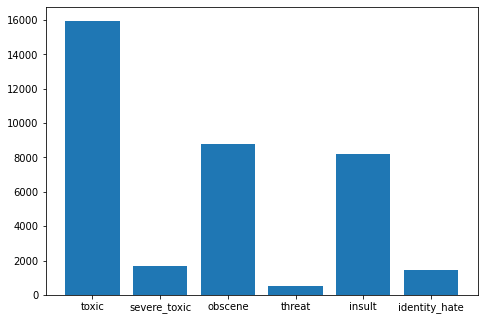

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"can't","cannot",text)
    text = re.sub(r"n't"," not",text) # see the space before not. 
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"let's","let us",text)
    text = re.sub(r"shan't","shall not",text)
    text = re.sub(r"won't","will not",text)
    text = re.sub(r"'re"," are",text)
    text = re.sub(r"'s"," ",text) 
    text = re.sub(r"'ve"," have",text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)  
    text = re.sub('\s+', ' ', text) 
    text = text.strip(' ') 
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r'[<>!#@$:.,%\?-]+', r'', text)
    
    return text

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: clean_text(x))

In [ ]:
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: clean_text(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
features.sum(axis=0) / features.shape[0]


toxic            0.095640
severe_toxic     0.010003
obscene          0.052764
threat           0.002979
insult           0.049198
identity_hate    0.008846
dtype: float64

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:

x = df['comment_text']
y = features 


In [ ]:
x.values

array(['explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now ',
       'd aww he matches this background colour i am seemingly stuck with thanks talk january utc',
       'hey man i am really not trying to edit war it just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info',
       ...,
       'spitzer umm theres no actual article for prostitution ring crunch captain',
       'and it looks like it was actually you who put on the speedy to have the first version deleted now that i look at it',
       'and i really do not think you understand i came here and my idea was bad right away what kind of community goes you have bad ideas go away instead of helping rewrite th

In [ ]:
x = df['comment_text']

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)


In [ ]:
x_train = train['comment_text']
x_test = test['comment_text']


In [ ]:
y_train = train.iloc[:, 2:8]
y_test = test.iloc[:, 2:8]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split

In [ ]:
x_train

28789     i have unreviewed a page you curated thanks fo...
130835    were not the creators either fired or quit bec...
117717    dyk did you know has been updated a fact from ...
54772     as for the stuttering slobbering simp oshwah a...
78864     here is your link again so do not saaume but r...
                                ...                        
119879    redirect talk john loveday experimental physicist
103694     back it up post the line here with the reference
131932    i wo not stop that sometimes germanic equals g...
146867    result keep and possibly merge page creation s...
121958    you are wrong justin thompson is mentioned in ...
Name: comment_text, Length: 111792, dtype: object

In [ ]:
import gensim


In [ ]:
import gensim.downloader as api
embedding_model = api.load("glove-wiki-gigaword-300")


[=================================================-] 99.4% 373.9/376.1MB downloaded

In [ ]:
index2word = embedding_model.index_to_key
word2in = {}
for i in range(len(embedding_model.key_to_index)):
  word2in[index2word[i]] = i
  


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text 

In [ ]:
tok = text.Tokenizer(num_words=20000)
tok.fit_on_texts(x_train.values)
tok_train = tok.texts_to_sequences(x_train.values)
tok_test = tok.texts_to_sequences(x_test.values)
x_train = pad_sequences(tok_train,maxlen = 100, padding ='post' )
x_test = pad_sequences(tok_test,maxlen = 100, padding ='post' )
word_index = tok.word_index



In [ ]:
t_test = tok.texts_to_sequences(df_test['comment_text'].values)
xn_test = pad_sequences(t_test,maxlen = 100, padding ='post' )

In [ ]:
x_test.shape

(52659, 100)

In [ ]:
emb_mat = np.zeros((min(20000, len(word_index)),300 ))
for w in word_index:
  try:
    emb_vector = embedding_model.get_vector(w)
    if emb_vector is not None:
      emb_mat[word_index[w]] = emb_vector
  except:
    continue



In [ ]:
len(word_index)

186908

In [ ]:
from keras.initializers import Constant

In [ ]:
x_train = data[:]

(166855, 100)

In [ ]:
features

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
166850,0,0,0,0,0,0
166851,0,0,0,0,0,0
166852,0,0,0,0,0,0
166853,0,0,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
emb_mat.shape

(186909, 300)

NameError: ignored

In [ ]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


x = df.drop(labels, axis=1)
y = df[labels]


label_counts = y.apply(pd.Series.value_counts)


print(label_counts)


    toxic  severe_toxic  obscene  threat  insult  identity_hate
0  150897        165186   158051  166358  158646         165379
1   15958          1669     8804     497    8209           1476


X_resampled.shape: (33840, 1)
y_resampled.shape: (33840,)


In [ ]:
from keras.layers import LSTM


In [ ]:
from keras.layers import CuDNNGRU, Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization

model = Sequential()
model.add(Embedding(20000,300,weights=[emb_mat],input_length=100,trainable=True))
#model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
# Add fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          6000000   
                                                                 
 lstm (LSTM)                 (None, 100, 50)           70200     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                        

In [ ]:
pred = model.predict(xn_test)



2000/2000 [==============================] - 84s 42ms/step


# New Section

In [ ]:
model.evaluate(x_train[:1000], y_train[:1000])

32/32 [==============================] - 2s 66ms/step - loss: 0.0381 - accuracy: 0.9930


[0.03811480477452278, 0.9929999709129333]

In [ ]:

yn_test = df_test.iloc[:,3:9]
yn_test


,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0,0,0,0,0,0
7,0,0,0,0,0,0
11,0,0,0,0,0,0
13,0,0,0,0,0,0
14,0,0,0,0,0,0
...,...,...,...,...,...,...
153150,0,0,0,0,0,0
153151,0,0,0,0,0,0
153154,0,0,0,0,0,0
153155,1,0,1,0,1,0


In [ ]:
model.evaluate(xn_test, yn_test)

2000/2000 [==============================] - 89s 45ms/step - loss: 0.0715 - accuracy: 0.9975


[0.07152798026800156, 0.997483491897583]

In [ ]:
for i in range(len(pred)):
  pred[i] = np.where(pred[i] > 0.5, 1, 0)
pred


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
yn_test

NameError: ignored

In [ ]:
y_lab = pred[:,0]
y_lab

yact = yn_test.iloc[:, 0]




In [ ]:
y_lab

array([0., 1., 0., ..., 1., 1., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# importing ML algos
from sklearn.ensemble import RandomForestClassifier

In [ ]:
recall_score(yact.to_numpy(), y_lab, average='micro')

0.9169401981931289

In [ ]:
confusion_matrix(yact.to_numpy(), y_lab)


array([[53893,  3995],
       [  951,  5139]])

In [ ]:

from sklearn.metrics import classification_report
 
print(classification_report(yact.to_numpy(), y_lab))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     57888
           1       0.56      0.84      0.68      6090

    accuracy                           0.92     63978
   macro avg       0.77      0.89      0.82     63978
weighted avg       0.94      0.92      0.93     63978



In [ ]:
x = df['comment_text']
y = df['toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
tfd = TfidfVectorizer(stop_words='english',max_features=5000)
x_train = tfd.fit_transform(x_train)
x_test = tfd.fit_transform(x_test)


In [ ]:
randomforest = RandomForestClassifier(n_estimators=10, random_state=42)
randomforest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
f1_score(randomforest.predict(x_test), y_test)

0.12009925558312655

In [ ]:
model

In [ ]:
seq = tok.texts_to_sequences(['You are amazing'])

In [ ]:
input_text = pad_sequences(seq,maxlen = 100, padding ='post' )


In [ ]:
model.predict(input_text)

1/1 [==============================] - 0s 44ms/step


array([[0.1358035 , 0.00633443, 0.02457454, 0.00567003, 0.04845703,
        0.00515481]], dtype=float32)

In [ ]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
29614,0,0,0,0,0,0
109036,0,0,0,0,0,0
110790,0,0,0,0,0,0
80583,0,0,0,0,0,0
30047,0,0,0,0,0,0
...,...,...,...,...,...,...
119879,0,0,0,0,0,0
103694,0,0,0,0,0,0
131932,1,0,0,0,0,0
146867,0,0,0,0,0,0
